# Вариант 7. Гибкость юношей первого курса в зависимости от веса.

Данные из файла Volgmed_2013.xls 
(конкретные данные выбрать в соответствии с вариантом) 
очистить от выбросов и пропусков, найти коэффициенты простой линейной регрессии 
с их пи-значениями и коэффициент детерминации. 

Вывести на графике диаграмму рассеяния с линией регрессии, 
оценить пи-значение для этой модели на основании 
20 000 стохастических моделирований.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [2]:
FILENAME = "Volgmed_2013.xlsx"
datapath = Path(FILENAME)

df = pd.read_excel(datapath, index_col=0, header=1)

df.head()

,Пол,Год рождения,Факультет,Курс,Группа,Год поступления,Дата обследования,"Рост, см","Вес, кг","Окружность грудной клетки в покое, см",...,"Гибкость, см","Время 10 хлопков, с","Прыжок в длину с места, см","Челночный бег, с","Силовой норматив, ед","Бег 100 м, с","Бег 2-3 км, мин","Статическая выносливость, с","Задержка дыхания, с","Равновесие, с"
№ п/п,,,,,,,,,,,,,,,,,,,,,
104.0,жен,1981.0,лечебный,1.0,NaN,1999,2000-05-01,176,74.5,90,...,22,6.6,155,26,38,17.7,8.7,140,59.0,90.0
104.0,жен,1981.0,лечебный,3.0,NaN,1999,2002-05-01,176,74,90,...,23,6.5,158,25,47,18.7,6.58,144,68.0,90.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = df[(df["Курс"] == 1) & ((df["Пол"] == "муж") | (df["Пол"] == "муж."))][["Гибкость, см", "Вес, кг"]]
data.reset_index(drop=True, inplace=True)
data.rename(columns={"Гибкость, см": "flexibility", "Вес, кг": "weight"}, inplace=True)

data.flexibility = pd.to_numeric(data.flexibility, errors="coerce")
data.weight = pd.to_numeric(data.weight, errors="coerce")
data.dropna(inplace=True)
data.flexibility = data.flexibility.astype(int)

data

,flexibility,weight
0,11,55.0
1,4,54.5
2,17,93.5
3,13,56.0
4,7,99.0
...,...,...
276,18,62.5
277,15,68.5
278,18,55.0
279,10,64.5


In [4]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
data = data[~((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).any(axis=1)]

data

,flexibility,weight
0,11,55.0
1,4,54.5
3,13,56.0
5,18,58.0
6,7,67.5
...,...,...
276,18,62.5
277,15,68.5
278,18,55.0
279,10,64.5


In [5]:
data.sort_values("weight", inplace=True)

x = sm.add_constant(data.weight)
y = data.flexibility
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            flexibility   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.487
Date:                Sat, 26 Oct 2024   Prob (F-statistic):              0.116
Time:                        00:08:51   Log-Likelihood:                -837.83
No. Observations:                 257   AIC:                             1680.
Df Residuals:                     255   BIC:                             1687.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2444      3.098      2.339      0.0

C:\Users\vladk\AppData\Local\Temp\ipykernel_12312\637249243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values("weight", inplace=True)


Коэффициент наклона: 0.0732 \
Свободный коэффициент: 7.2444 \
Коэффициент детерминации R^2: 0.010 \
p-значение для наклона: 0.116 \
p-значение для свободного коэффициента: 0.020

In [6]:
# Из лекции

simple_regr_res = y - model.fittedvalues
sum_regr_res = np.cumsum(simple_regr_res)
sigma = np.std(simple_regr_res)
emp_bridge = sum_regr_res / len(sum_regr_res) ** 0.5 / sigma
J = np.max(np.abs(emp_bridge))

J

np.float64(0.4277105209269441)

In [7]:
# Из лекции

N_ITER = 20_000

n = len(data)
counter = 0
for i in range(N_ITER):
    Y_temp = stats.norm.rvs(0, 1, n) * sigma + data.weight
    res = sm.OLS(Y_temp, x).fit()

    simple_regr_res = Y_temp - res.fittedvalues
    sum_reger_res = np.cumsum(simple_regr_res)
    emp_bridge = sum_reger_res / len(simple_regr_res) ** 0.5 / np.std(simple_regr_res)
    J_temp = np.max(np.abs(emp_bridge))

    if J_temp > J:
        counter += 1

print("p-value модели:", counter / N_ITER)

p-value модели: 0.94175


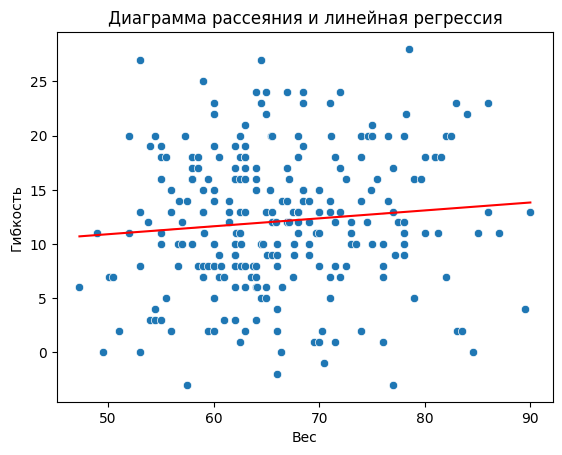

In [8]:
sns.scatterplot(x=data.weight, y=data.flexibility)
sns.lineplot(x=data.weight, y=model.fittedvalues, color="red")

plt.title("Диаграмма рассеяния и линейная регрессия")
plt.xlabel("Вес")
plt.ylabel("Гибкость")

plt.show()